In [77]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

# 我最终的目的是为了展示top 10 商品
 - 可以测试一下自己的oneHot编码吗？
     先oneHotEncode -> sum -> sort -> [:10]

In [42]:
df = pd.read_csv('./MakeBasket.csv',header=None,keep_default_na=False)

In [43]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,,,,,,,,,,,,,,,,,
2,chutney,,,,,,,,,,,,,,,,,,,
3,turkey,avocado,,,,,,,,,,,,,,,,,,
4,mineral water,milk,energy bar,whole wheat rice,green tea,,,,,,,,,,,,,,,


In [58]:
def one_hot_encode(df):
    values = pd.unique(df.values.reshape(1,-1)[0])
    keys = values[values != '']
    index_list = [ (i,c) for i,v in df.iterrows() for c in v if c != '' ]
    arr = np.zeros((len(df),len(keys)),dtype=int)
    df_new = pd.DataFrame(arr,columns=keys)
    for r,c in index_list:
        df_new.loc[r,c] = 1
    return df_new

In [59]:
df_new = one_hot_encode(df)

In [93]:
top10 = df_new.sum().sort_values(ascending=False)[:10]

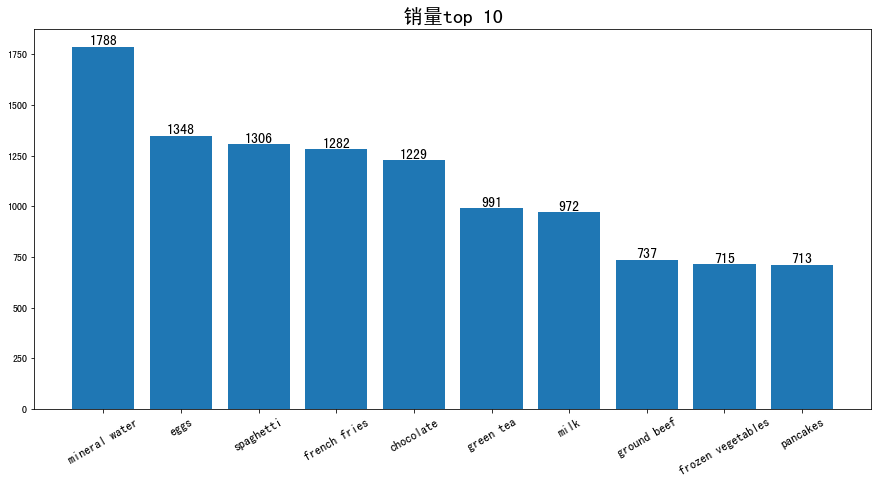

In [92]:
plt.figure(figsize=[15,7])
plt.bar(top10.index,top10.values)
plt.title('销量top 10',fontsize=20)
plt.xticks(top10.index,top10.index,size='large',rotation=30)
for a,b in zip(top10.index,top10.values):
        plt.text(a,b+0.01,'%.0f'%b,ha = 'center',va = 'bottom',fontsize=14)
plt.show()

# 词云展示 图片请看test.jpg

In [65]:
from wordcloud import WordCloud

In [76]:
text = ' '.join([key for i,v in df.iteritems() for key in v.values]) 

In [75]:
wc = WordCloud(max_words=10)
wc.generate(text).to_file('./test.jpg')